In [30]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt


In [31]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


In [32]:
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
#Din = 3072 # CIFAR10
print('Noof classes:',K)
print('Noof training images:',Ntr)
print('Noof test images:',Nte)
#print('Noof features:',Din)

x_train=x_train[range(Ntr),:]
y_train=y_train[range(Ntr),:]
x_test=x_test[range(Nte),:]
x_test=x_test[range(Nte),:]


Noof classes: 10
Noof training images: 50000
Noof test images: 10000


In [33]:
print('original labels:',y_train.shape)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
print('labels in class matrix:',y_train.shape)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,32,32,3))
x_test = np.reshape(x_test,(Nte,32,32,3))
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
#mean_image = np.mean(x_train, axis=0)
#x_train = x_train - mean_image
#x_test = x_test - mean_image

original labels: (50000, 1)
labels in class matrix: (50000, 10)
x_train: (50000, 32, 32, 3)
x_test: (10000, 32, 32, 3)


CNN

In [34]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(keras.layers.Dense(10, activation='softmax'))

opt = keras.optimizers.SGD(lr=0.001, momentum=0.1)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'] )


print(model.summary())

training_history = model.fit(x_train, y_train,epochs=100, batch_size=50, validation_data=(x_test,  y_test), verbose = 2)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 1024)            

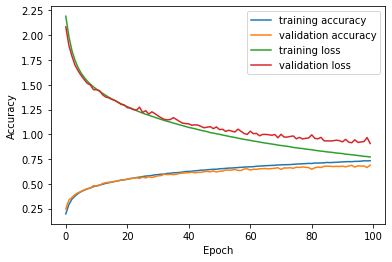

In [39]:
plt.plot(training_history.history['accuracy'],label='training accuracy')
plt.plot(training_history.history['val_accuracy'],label='validation accuracy')

plt.plot(training_history.history['loss'],label='training loss')
plt.plot(training_history.history['val_loss'],label='validation loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig('Losses and Accuracies.png')
plt.legend()
plt.show()

In [36]:
test_loss , test_acc=model.evaluate(x_test,y_test,verbose=2)

313/313 - 3s - loss: 0.9076 - accuracy: 0.6891
